Exercise Sheet 1 **Visual Perception**

__Adu Matory__ and __Lukas Braun__, October 18, 2019

In [0]:
import itertools
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.image as imgio

**Exercise 1: Frequency content of natural images and the
Fourier transform**

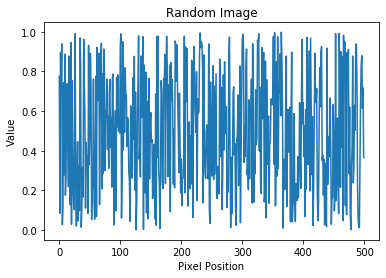

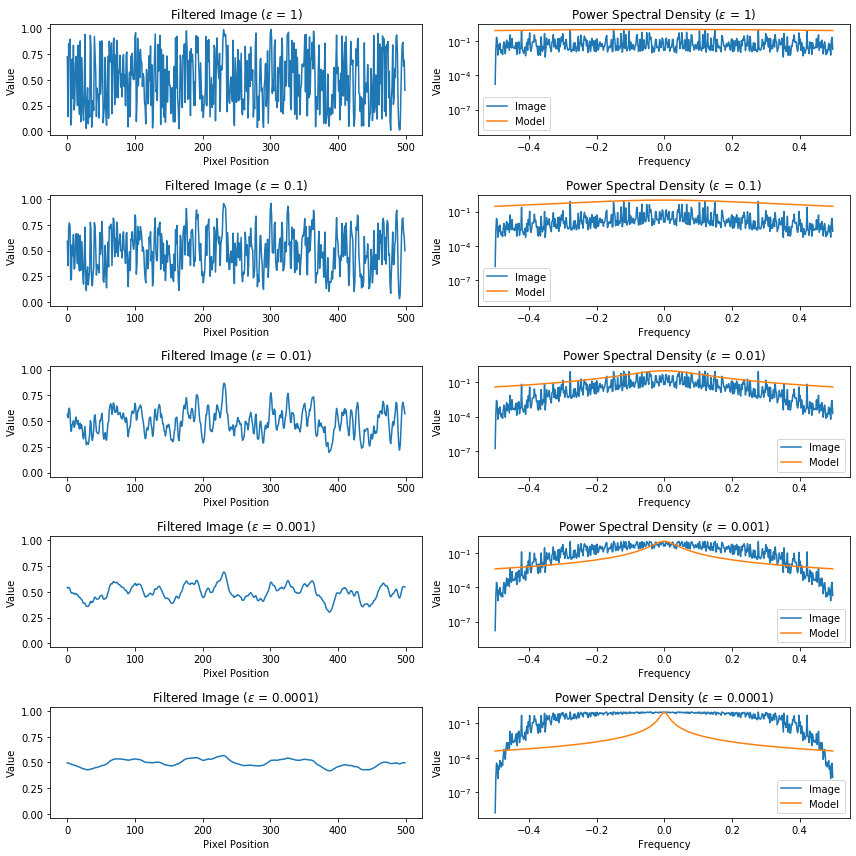

In [9]:
# 1.1
def psd(k, epsilon):
    return 1/(epsilon+np.abs(k)**2)

img_size = 500
rnd = np.random.uniform(0, 1, img_size)

fig, ax = plt.subplots()
ax.plot(rnd)
ax.set_title("Random Image")
ax.set_xlabel("Pixel Position")
ax.set_ylabel("Value")

fft = np.fft.fft(rnd)
sample_frequencies = np.fft.fftfreq(img_size)
idx = np.argsort(sample_frequencies)

fig, axs = plt.subplots(5, 2, figsize=(12, 12), sharey='col')
for i, epsilon in enumerate([1, 0.1, 0.01, 0.001, 0.0001]):
    psd_filter = psd(sample_frequencies, epsilon)
    psd_filter = psd_filter*epsilon
    filtered_fft = fft*psd_filter

    image = np.fft.ifft(filtered_fft)
    image_fft = np.fft.fft(image)
    
    psd_model = psd(sample_frequencies, epsilon)[idx]
    psd_model = psd_model*epsilon
    psd_image = np.fft.fftshift(psd(image_fft, epsilon))[idx]
    psd_image = psd_image*epsilon
    
    axs[i, 0].plot(np.real(image))
    axs[i, 0].set_title(f"Filtered Image ($\\epsilon$ = {epsilon})")
    axs[i, 0].set_xlabel("Pixel Position")
    axs[i, 0].set_ylabel("Value")
    
    axs[i, 1].semilogy(sample_frequencies[idx], psd_image, label="Image")
    axs[i, 1].semilogy(sample_frequencies[idx], psd_model, label="Model")
    axs[i, 1].legend()
    axs[i, 1].set_title(f"Power Spectral Density ($\\epsilon$ = {epsilon})")
    axs[i, 1].set_xlabel("Frequency")
    axs[i, 1].set_ylabel("Value")
fig.tight_layout(fourier = np.fft.fft(im_1d)

The smaller $\epsilon$ becomes, the more of the power is used for low frequencies and the less power is used for high frequencies. As a consequence high frequencies are filtered out more strongly (low-pass filter).

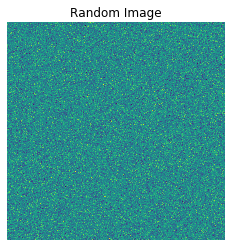

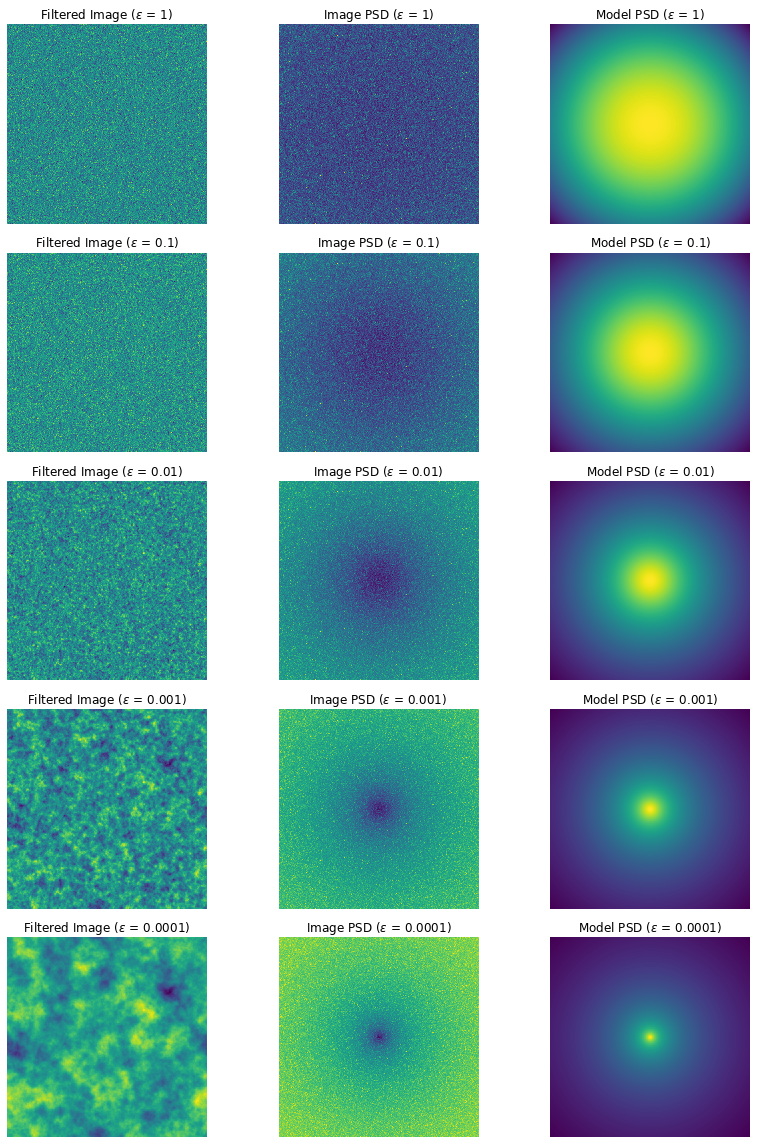

In [10]:
# 1.2
img_size = (500, 500)
rnd = np.random.normal(0, 1, img_size)

fig, ax = plt.subplots()
ax.imshow(rnd)
ax.axis("off")
ax.set_title("Random Image")
ax.set_xlabel("Pixel Position")
ax.set_ylabel("Value")

fft = np.fft.fft2(rnd)
frequencies_x = np.fft.fftfreq(img_size[0])
frequencies_y = np.fft.fftfreq(img_size[1])

xy, yx = np.meshgrid(frequencies_x, frequencies_y)
xyyx = xy+yx*1j

fig, axs = plt.subplots(5, 3, figsize=(12, 16), sharey='col')
for i, epsilon in enumerate([1, 0.1, 0.01, 0.001, 0.0001]):
    psd_filter = psd(xyyx, epsilon)
    psd_filter = psd_filter*epsilon
    filtered_fft = fft*psd_filter

    image = np.fft.ifft2(filtered_fft)
    image_fft = np.fft.fft2(image)
    
    psd_model = np.fft.fftshift(psd(xyyx, epsilon))
    psd_model = psd_model*epsilon
    psd_image = np.fft.fftshift(psd(image_fft, epsilon))
    psd_image = psd_image*epsilon
    
    axs[i, 0].imshow(np.real(image))
    axs[i, 0].axis("off")
    axs[i, 0].set_title(f"Filtered Image ($\\epsilon$ = {epsilon})")
    axs[i, 0].set_xlabel("Pixel Position")
    axs[i, 0].set_ylabel("Value")
    
    axs[i, 1].imshow(np.log(psd_image))
    axs[i, 1].axis("off")
    axs[i, 1].set_title(f"Image PSD ($\\epsilon$ = {epsilon})")
    axs[i, 1].set_xlabel("Frequency")
    axs[i, 1].set_ylabel("Value")
    
    axs[i, 2].imshow(np.log(psd_model))
    axs[i, 2].axis("off")
    axs[i, 2].set_title(f"Model PSD ($\\epsilon$ = {epsilon})")
    axs[i, 2].set_xlabel("Frequency")
    axs[i, 2].set_ylabel("Value")
fig.tight_layout()

No, the results do not look natural. We are missing spatial structure / spatial correlations within the image.

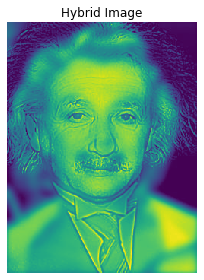

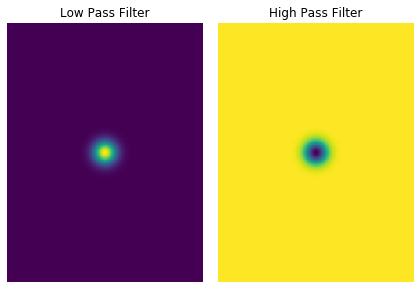

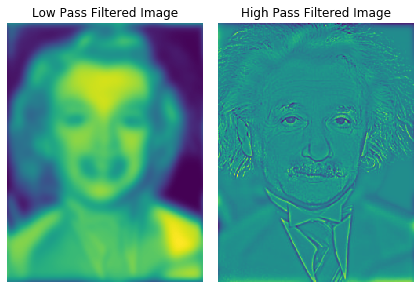

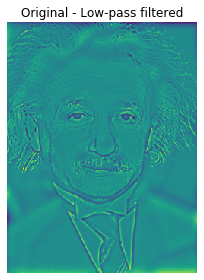

In [11]:
# 1.3
img = imgio.imread("./hybrid.png")

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis("off")
ax.set_title("Hybrid Image")
fig.tight_layout()

img_size = img.shape
border = (np.max(img_size)-np.min(img_size))//2
lpf = signal.windows.gaussian(np.max(img_size), 10)
lpf = np.outer(lpf, lpf)[:, border:-border]
hpf = 1 - lpf

fig, axs = plt.subplots(1, 2)
axs[0].imshow(lpf)
axs[0].axis("off")
axs[0].set_title("Low Pass Filter")
axs[1].imshow(hpf)
axs[1].axis("off")
axs[1].set_title("High Pass Filter")
fig.tight_layout()

fft = np.fft.fft2(img)
fft = np.fft.fftshift(fft)

# Convolution in image space == multiplication in fourier space
fft_lpf = fft*lpf
fft_hpf = fft*hpf

img_lpf = np.fft.ifft2(np.fft.fftshift(fft_lpf))
img_hpf = np.fft.ifft2(np.fft.fftshift(fft_hpf))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(np.real(img_lpf))
axs[0].axis("off")
axs[0].set_title("Low Pass Filtered Image")
axs[1].imshow(np.real(img_hpf))
axs[1].axis("off")
axs[1].set_title("High Pass Filtered Image")
fig.tight_layout()

# Solution without hpf
fig, ax = plt.subplots()
ax.imshow(img-np.real(img_lpf))
ax.axis("off")
ax.set_title("Original - Low-pass filtered")
fig.tight_layout()

**Why does generating the filter in this manner work?**  
By using spectral inversion, the low frequencies which are passed by the low-pass filter (where the Gaussian has it's peek) are subtracted from 1 and are consequently filtered out in the high-pass filter and similarly the flat tails of the Gaussian leave the 1 basically unchanged and thus is letting the high frequencies pass, which are filtered by the low-pass filter.

**Is there an equivalent approach that doesn't require computing the high-pass filter**  
Yes, we can subtract the low-pass filtered image from the original image

**How did the filtering process change the visual perception?**  
Surprise, surprise! No there is Einstein and Marylin!

**Can you find a relation to what is happening when you look at the image close-up or from a distance?**  
From close-up, Einstein dominates the perception, form further away Marylin does.

**Exercise 2: “Natural input” for cell in the early visual system**

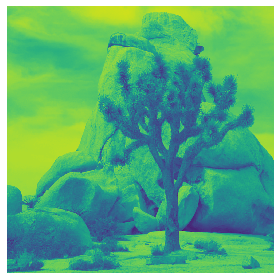

In [12]:
# 2.1
img = imgio.imread("./natural/natural1.png")

fig, ax = plt.subplots()
ax.imshow(img, vmin=0, vmax=1)
ax.axis("off")
fig.tight_layout()


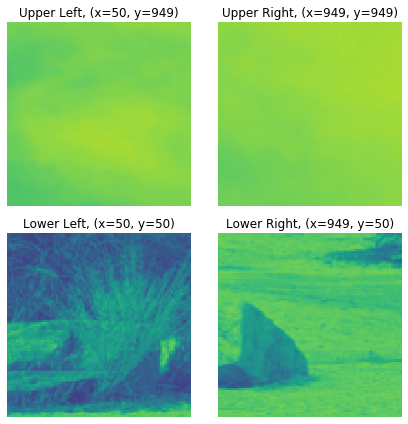

In [13]:
# 2.2
def patch(img, x, y, lx, ly):
    assert lx % 2 != 0 and ly % 2 != 0
    y_max, x_max = img.shape
    y = y_max - y - 1
    
    left = x-lx//2
    right = 1+x+lx//2
    bottom = y-ly//2
    top = 1+y+ly//2
    
    assert left >= 0 and right <= x_max and bottom >= 0 and top <= y_max
    
    return img[bottom:top, left:right]

# Test
lx = ly = 101
x_half = lx//2
y_half = ly//2
y_max, x_max = np.asarray(img.shape)-1

tests = [[(x_half, y_max-y_half), "Upper Left"],
         [(x_max-x_half, y_max-y_half), "Upper Right"],
         [(x_half, y_half), "Lower Left"],
         [(x_max-x_half, y_half), "Lower Right"]]

fig, axs = plt.subplots(2, 2, figsize=(6, 6))
axs = axs.flatten()
for i, ((x, y), label) in enumerate(tests):
    patch_ = patch(img, x, y, lx, ly)
    axs[i].imshow(patch_, vmin=0, vmax=1)
    axs[i].axis('off')
    axs[i].set_title(f"{label}, (x={x}, y={y})")
fig.tight_layout()

In [0]:
# Simulate Saccades
def saccade(img, lx, ly, micro_saccades_n, sigma):
    y_max, x_max = np.asarray(img.shape)-1
    x = np.random.randint(int(x_max*0.25), int(x_max*0.75))
    y = np.random.randint(int(y_max*0.25), int(y_max*0.75))
    
    xys = []
    patches = np.zeros((micro_saccades_n, lx, ly))
    
    for i in range(micro_saccades_n):
        xys.append([x, y])
        patches[i] = patch(img, x, y, lx, ly)
        x += int(np.round(np.random.normal(0, sigma)))
        y += int(np.round(np.random.normal(0, sigma)))

    return patches, np.asarray(xys)

def plot_saccades(img, saccades, xys, label):
    saccades_n = saccades.shape[0]
    fig = plt.figure(figsize=(14, 4))
    gs = fig.add_gridspec(2, 2+saccades_n//2)
    ax = fig.add_subplot(gs[:, 0:2])
    ax.imshow(img)
    ax.plot(xys[:, 0], xys[:, 1], c="red")
    ax.axis('off')
    ax.set_title(f"{label}s")
    
    axs = [fig.add_subplot(gs[n, 2+i]) for n in range(2) for i in range(saccades_n//2)]
    for i, saccade in enumerate(saccades):
        axs[i].imshow(saccade, vmin=0, vmax=1)
        axs[i].axis('off')
        axs[i].set_title(f"{label} {i+1}")
    fig.tight_layout()

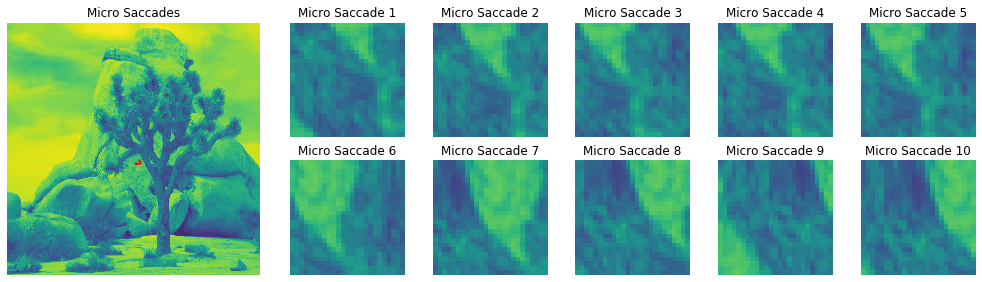

In [15]:
# 2.3
lx = ly = 25
micro_saccades_n = 10
sigma = 4

micro_saccades, xys = saccade(img, lx, ly, micro_saccades_n, sigma)
plot_saccades(img, micro_saccades, xys, "Micro Saccade")

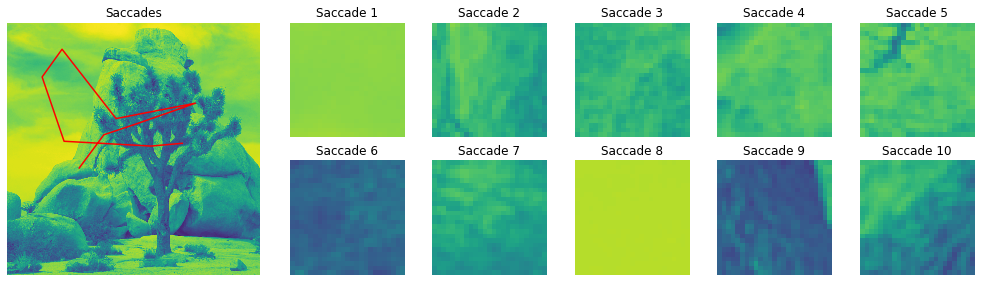

In [16]:
# 2.4
lx = ly = 25
micro_saccades_n = 10
sigma = 250

failed = True
while failed:
    try:
        saccades, xys = saccade(img, lx, ly, micro_saccades_n, sigma)
    except:
        continue
    failed = False

plot_saccades(img, saccades, xys, "Saccade")

#### 2.5
In the micro saccade condition, large parts of the crops remain identical despite a small spatial shift. In contrast, the samples of the saccade condition do not show any (obvious) correlations from one crop to the next. They appear like random crops of the image.

One way to quantify this difference is, to compare statistical measures like the variance of the means or the variance of the variances for a set of crops. While the variance in the means and variances in the micro saccade condtion is very small, the variance within the means and variances in the saccade condtion is large.

In order to have an online measure for the type of the last saccade, on coud compare the change of power spectral densities from one crop to the next. The PSD is insensitive to small spatial shifts but yields very diverse results for crops from different positions of the image. Thus, if the change in the PSD is small, it was (very likely) a micro saccade, however, if the change is large, it was (very likely) a saccade.

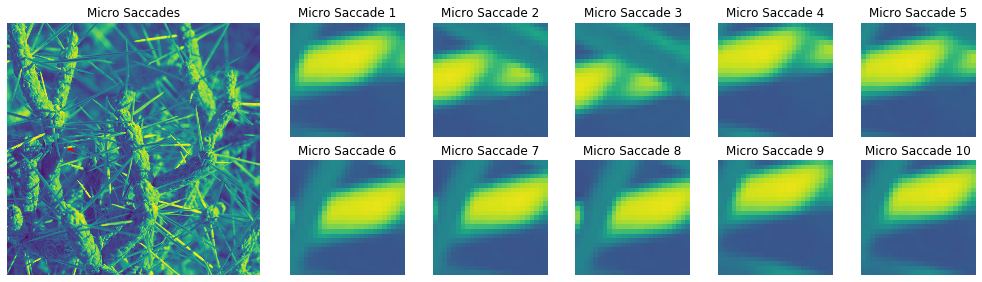

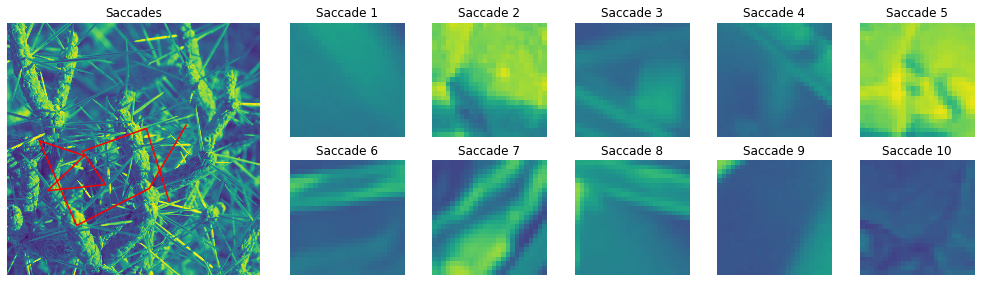

In [17]:
# 2.6
img = imgio.imread("./natural/natural2.png")

# Micro Saccades
lx = ly = 25
micro_saccades_n = 10
sigma = 4

micro_saccades, xys = saccade(img, lx, ly, micro_saccades_n, sigma)
plot_saccades(img, micro_saccades, xys, "Micro Saccade")

# Saccades
lx = ly = 25
micro_saccades_n = 10
sigma = 250

failed = True
while failed:
    try:
        saccades, xys = saccade(img, lx, ly, micro_saccades_n, sigma)
    except:
        continue
    failed = False

plot_saccades(img, saccades, xys, "Saccade")